In [11]:
% matplotlib inline

from __future__ import division
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile

In [17]:
# import data directly from myria
# binned cytograms by cruise in fsc/chl space

fileURL = 'https://rest.myria.cs.washington.edu:1776/dataset/user-armbrustlab/program-seaflow/relation-binned_phyto_32bins_bigchl_byCruise/data?format=csv'
result = pd.read_csv(fileURL)
print(result.columns)
cruise = (pd.unique(result['Cruise']))
cc = len(cruise)


Index([u'Cruise', u'fsc_bin', u'chl_bin', u'num_p'], dtype='object')


In [18]:
# sort the data by cruise, chl_bin and fsc_bin
sorted_ = result.sort(['Cruise', 'fsc_bin', 'chl_bin'], ascending=[1, 1, 1])


In [19]:
# create the axes for fsc and chl

a_min = -2**16
a_max = 2**16
nbins = 32
a_step = a_max/nbins*2
x = y = np.linspace(a_min,a_max,nbins,endpoint=False)
X, Y = np.meshgrid(x, y)


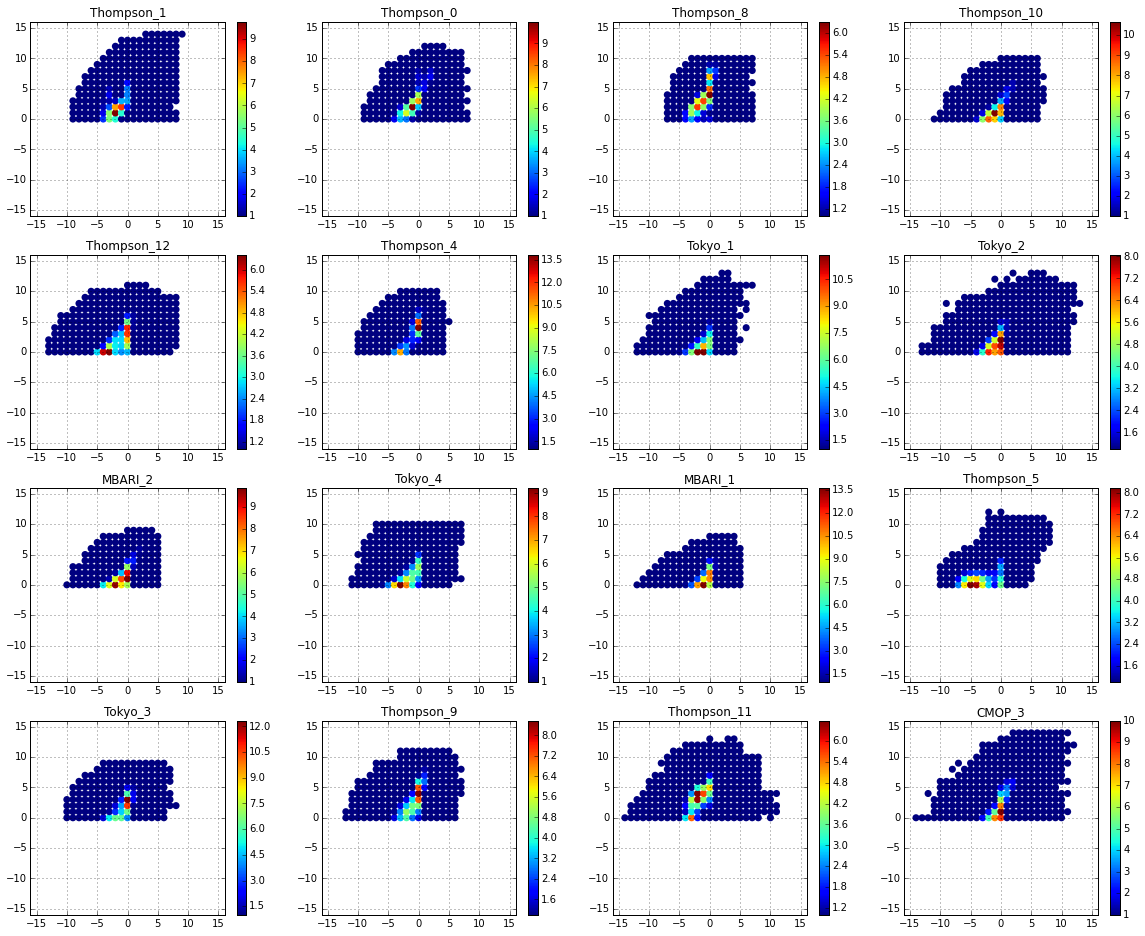

In [20]:
# pick the cruise that you want to plot the cytogram for

plt.figure(figsize=(20,16))

for c in range(cc):
    subset = sorted_[sorted_['Cruise']==cruise[c]]

    x = subset['fsc_bin'].values
    y = subset['chl_bin'].values
    z = (subset['num_p'].values)/(np.sum(subset['num_p'].values))*100
    
    plt.subplot(4,4,c+1)
 #   plt.figure(figsize=(10,8))
    plt.scatter(x, y, s=50, c=z,edgecolor='none', vmin= 1)
    plt.colorbar()
    plt.axis([-16, 16, -16, 16])
    plt.title(cruise[c])
    plt.grid(True)
plt.show()